### **Implementation of LeNet-5**

**Coder: Arka Roy**

**Website: [https://github.com/rsarka34](https://github.com/rsarka34)**

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rsarka34/NPTEL-ML-DL-NOC24EE146/blob/main/NPTEL_RNN.ipynb)

In [7]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [11]:
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('/content/AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [13]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [14]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [15]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 2s - 18ms/step - loss: 0.0527
Epoch 2/100
94/94 - 0s - 2ms/step - loss: 0.0277
Epoch 3/100
94/94 - 0s - 2ms/step - loss: 0.0197
Epoch 4/100
94/94 - 1s - 5ms/step - loss: 0.0174
Epoch 5/100
94/94 - 1s - 7ms/step - loss: 0.0161
Epoch 6/100
94/94 - 0s - 5ms/step - loss: 0.0150
Epoch 7/100
94/94 - 0s - 3ms/step - loss: 0.0138
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0125
Epoch 9/100
94/94 - 0s - 4ms/step - loss: 0.0113
Epoch 10/100
94/94 - 1s - 5ms/step - loss: 0.0100
Epoch 11/100
94/94 - 0s - 3ms/step - loss: 0.0087
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0075
Epoch 13/100
94/94 - 0s - 3ms/step - loss: 0.0064
Epoch 14/100
94/94 - 0s - 3ms/step - loss: 0.0054
Epoch 15/100
94/94 - 0s - 3ms/step - loss: 0.0045
Epoch 16/100
94/94 - 0s - 3ms/step - loss: 0.0038
Epoch 17/100
94/94 - 0s - 3ms/step - loss: 0.0032
Epoch 18/100
94/94 - 0s - 4ms/step - loss: 0.0028
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0025
Epoch 20/100
94/94 - 0s - 2ms/step - loss: 0.0023
Epoch 21/100
94/94 -

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Train Score: 22.74 RMSE
Test Score: 50.68 RMSE


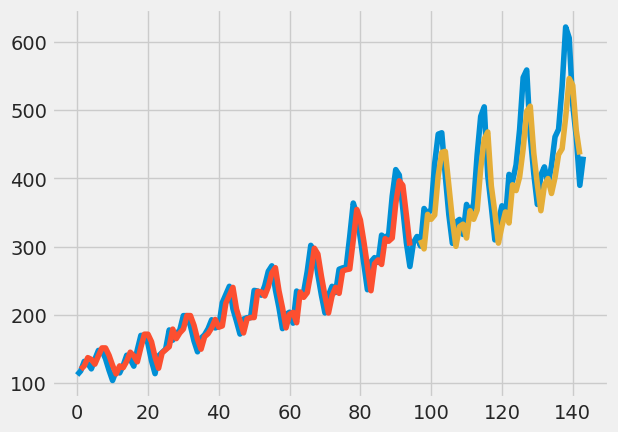

In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()